In [0]:
import numpy as np
import matplotlib.pyplot as plt 
import cv2
from sklearn.externals import joblib
from skimage.feature import hog

In [0]:
!pip install -U -q PyDrive

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)



In [0]:
link = 'https://drive.google.com/open?id=1NkYmGWH5UQXsSVD4Tx8ftwQ7Labsgo8l'
file_name='MNIST_HOG_model.sav'
fluff, id = link.split('=')
# print (id)
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile(file_name)  
from sklearn.externals import joblib
clf=joblib.load(file_name)

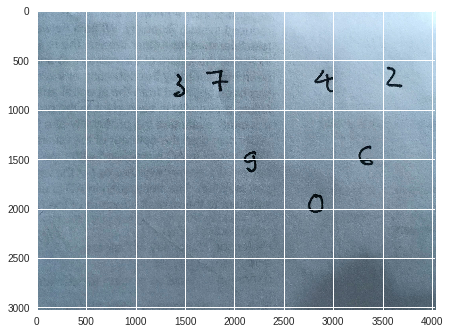

In [158]:
link1 = 'https://drive.google.com/open?id=1gOdGeZKXJzeQmnw6sa18Wit0gaIBWzhI'
pic_name='pic.jpg'
fluff, id = link1.split('=')
# print (id)
downloaded1 = drive.CreateFile({'id':id}) 
downloaded1.GetContentFile(pic_name)  
from sklearn.externals import joblib
img=cv2.imread(pic_name)
plt.imshow(img)
plt.show()

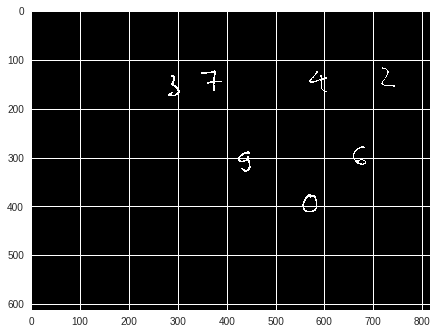

In [159]:
#Reshape Image
total_pixel = 500000.0
ratio = float(img.shape[1]) / float(img.shape[0])
new_h = int((total_pixel / ratio)**0.5 + 0.5)
new_w = int((new_h * ratio) + 0.5)
img = cv2.resize(img, (new_w,new_h))


gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray = cv2.GaussianBlur(gray, (5, 5), 0)

ret,thresh = cv2.threshold(gray,50,255,cv2.THRESH_BINARY_INV)
image, contours, hierarchy = cv2.findContours(thresh.copy(),cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)

# Get rectangles contains each contour
rects = [cv2.boundingRect(ctr) for ctr in contours]
rects =sorted(rects, key=lambda x: x[0])
plt.imshow(thresh, cmap='gray')
plt.show()

/usr/local/lib/python3.6/dist-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


Text(0.5,1,'Last digit, classified as: 2')

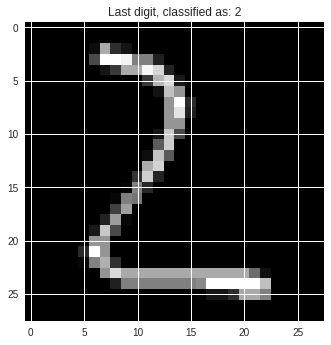

In [162]:
RESULTS=[]
for rect in rects:
    # Draw the rectangles
    cv2.rectangle(img, (rect[0], rect[1]), (rect[0] + rect[2], rect[1] + rect[3]), (0,255,0), 2) 
    # Make the rectangular region around the digit
    leng = int(rect[3] * 1.2)
    pt1 = int(rect[1] + rect[3] // 2 - leng // 2)
    pt2 = int(rect[0] + rect[2] // 2 - leng // 2)
    roi = thresh[pt1:pt1+leng, pt2:pt2+leng]


    
##    # Resize the image
    roi_pic = cv2.resize(roi, (28, 28), interpolation=cv2.INTER_AREA)


    plt.show()
    roi_hog_fd = hog(roi_pic, orientations=9, pixels_per_cell=(7, 7), cells_per_block=(1, 1), visualise=False)
    roi_hog_fd=roi_hog_fd.reshape((1,144))


    nbr = clf.predict(roi_hog_fd)
    nbr=np.argmax(nbr) 
    cv2.putText(img, str(int(nbr)), (rect[0], rect[1]),cv2.FONT_HERSHEY_DUPLEX, 2, (255, 0, 0), 2)
    RESULTS.append(nbr)

plt.imshow(roi_pic, cmap='gray')
plt.title('Last digit, classified as: {}'.format(int(nbr)))

Found digits:  [3, 7, 9, 0, 4, 6, 2]


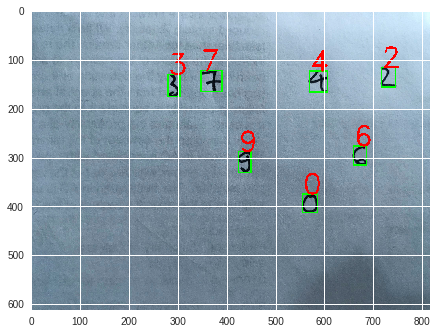

In [161]:
print("Found digits: ", RESULTS)
plt.imshow(img,cmap="gray")
plt.show()